In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
languages = pd.read_csv("QueryResults.csv",parse_dates=[0],header=0,names=['DATE','TAG','POSTS'])

In [23]:
languages

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [24]:
languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB


In [25]:
languages.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

# Tag Counts

In [34]:
languages.groupby('TAG').sum().sort_values(by='POSTS',ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


# Month Counts

In [29]:
languages.groupby('TAG').DATE.nunique()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64

In [41]:
pivoted = languages.pivot(index='DATE',columns='TAG',values='POSTS').fillna(0)

In [43]:
pivoted

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [44]:
pivoted.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

# JAVA vs Python Popularity

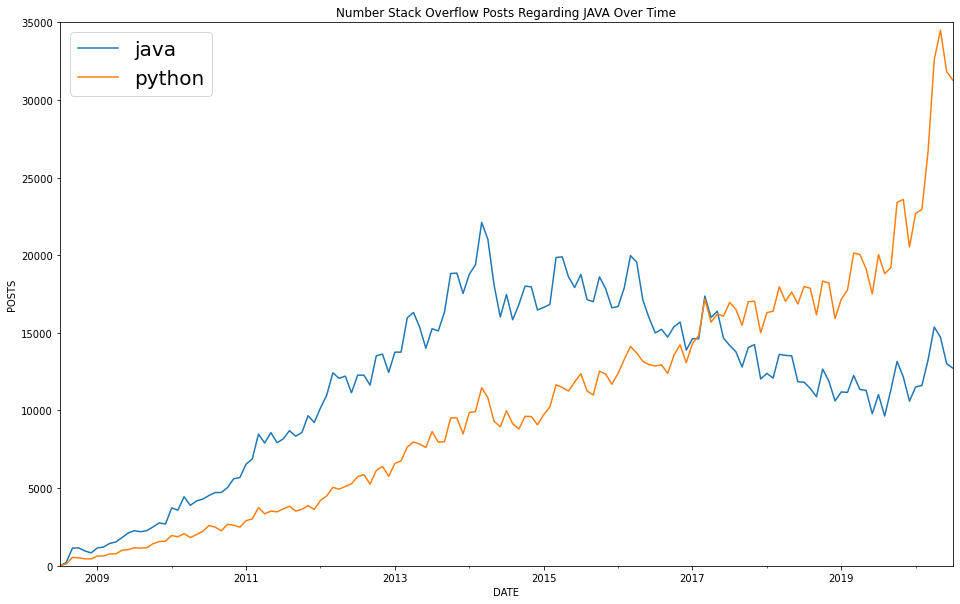

In [53]:
fig,ax = plt.subplots(figsize=(16,10))
pivoted[['java','python']].plot(ax=ax)
ax.set_ylabel("POSTS")
ax.set_ylim(0,35000)
ax.set_title("Number Stack Overflow Posts Regarding JAVA Over Time")
ax.legend(fontsize=20)

# Compare all languages

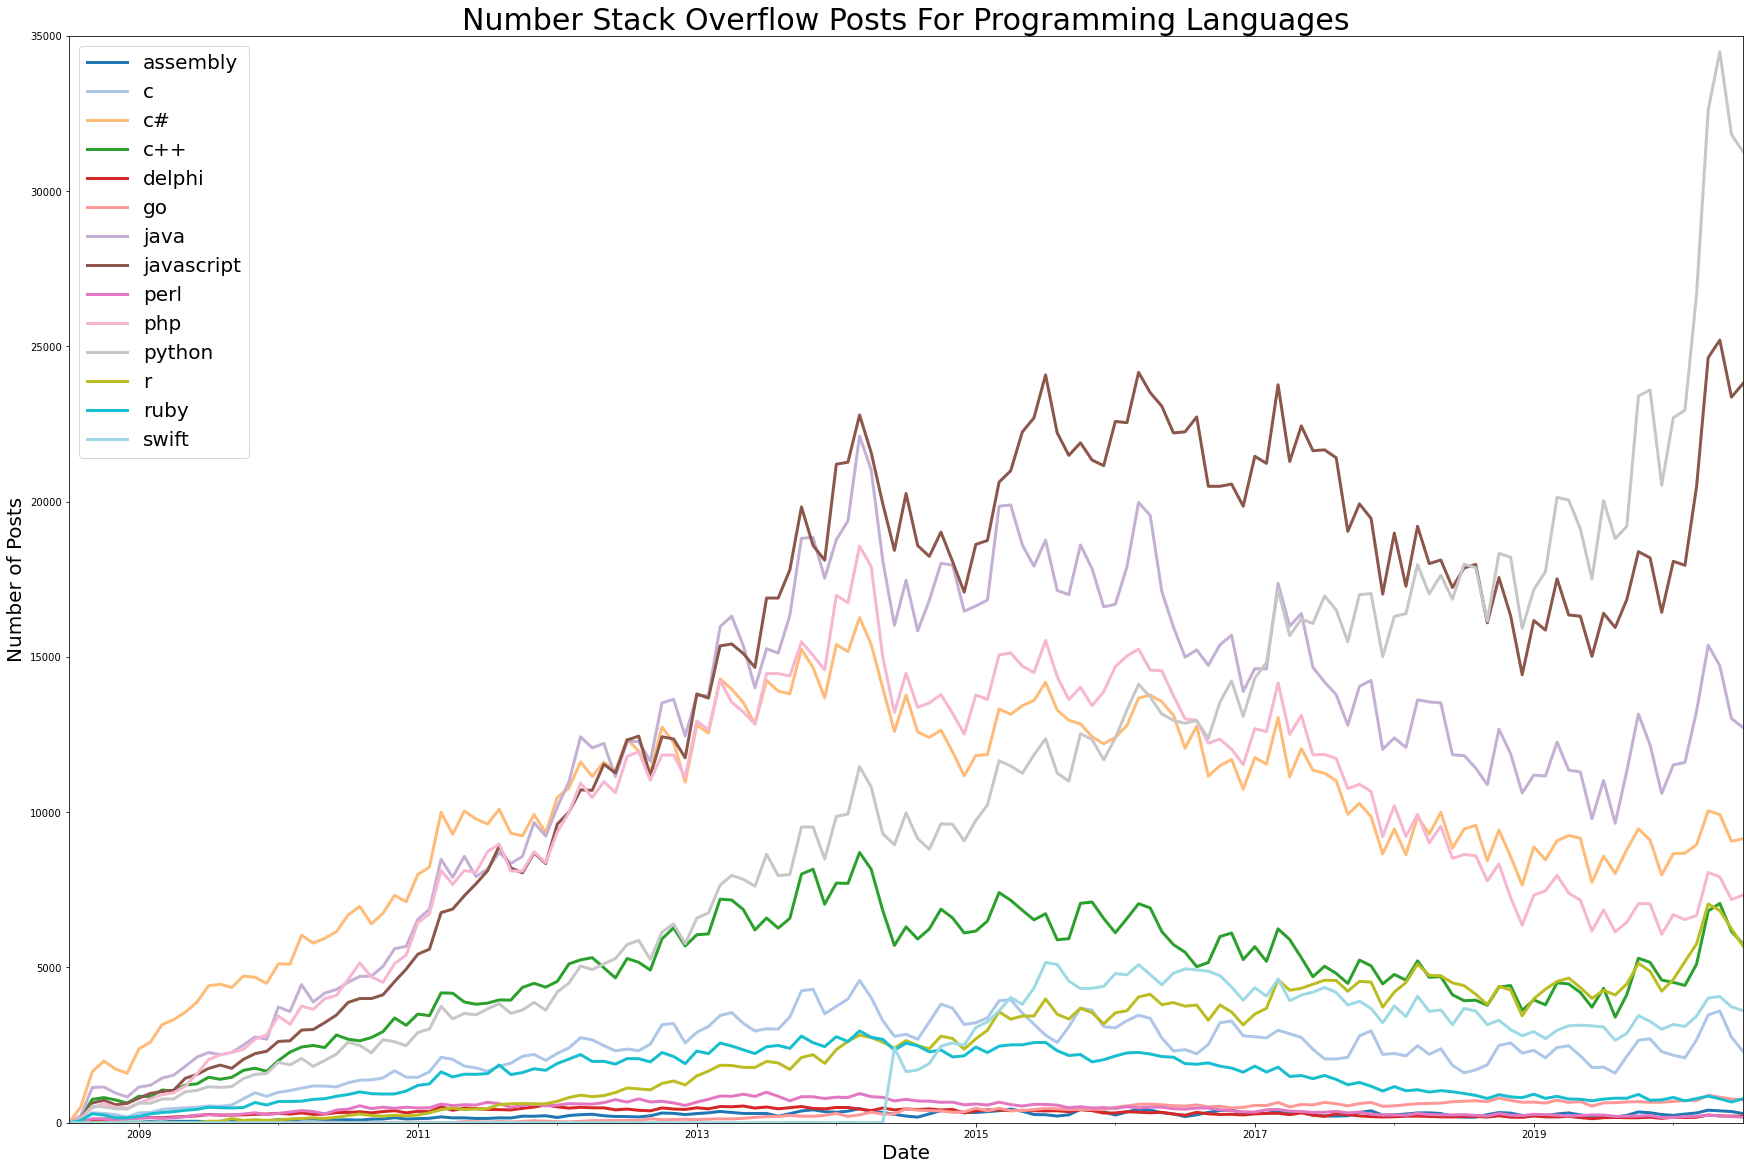

In [87]:
fig,ax = plt.subplots(figsize=(30,20))
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1,14)]
ax.set_prop_cycle('color', colors)
pivoted.plot(ax=ax,linewidth=3)
ax.set_ylabel("Number of Posts",fontsize=20)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylim(0,35000)
ax.set_title("Number Stack Overflow Posts For Programming Languages",fontsize=30)
ax.legend(fontsize=20)

# Rolling 7 Day Average of Posts

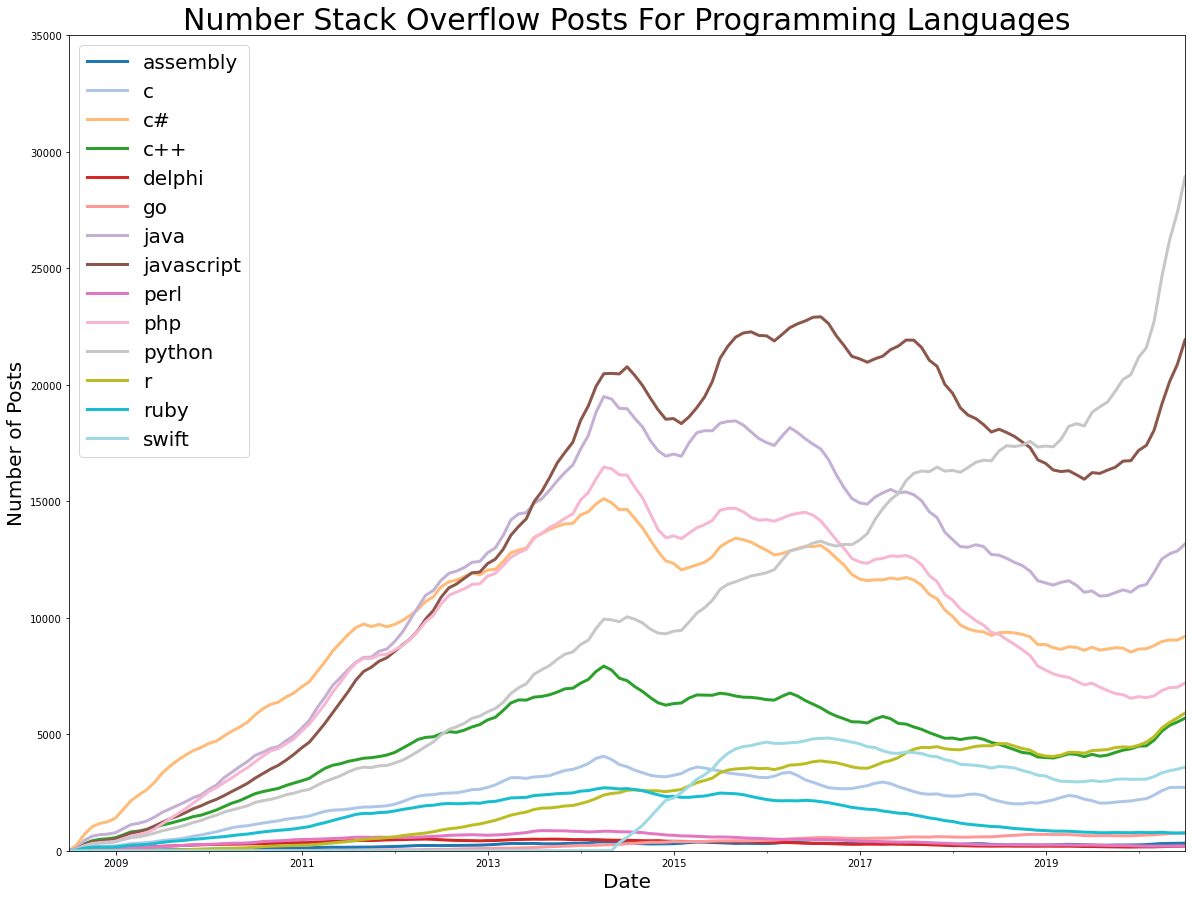

In [89]:
fig,ax = plt.subplots(figsize=(30,20))
colormap = plt.cm.tab20
colors = [colormap(i) for i in np.linspace(0, 1,14)]
ax.set_prop_cycle('color', colors)
pivoted.rolling(window=7,min_periods=0).mean().plot(figsize=(20,15),linewidth=3,ax=ax)
ax.set_ylabel("Number of Posts",fontsize=20)
ax.set_xlabel("Date",fontsize=20)
ax.set_ylim(0,35000)
ax.set_title("Number Stack Overflow Posts For Programming Languages",fontsize=30)
ax.legend(fontsize=20)


In [79]:
languages.set_index('DATE').loc["2008": "2012"].groupby('TAG').POSTS.sum().sort_values(ascending=False)

TAG
c#            380295
java          326416
php           302387
javascript    291184
c++           161887
python        148417
c              76816
ruby           59443
perl           22765
r              20814
delphi         17894
assembly        6899
go              1509
swift            142
Name: POSTS, dtype: int64

In [80]:
languages.set_index('DATE').loc["2015": "2018"].groupby('TAG').POSTS.sum().sort_values(ascending=False)

TAG
javascript    979868
java          733806
python        694925
php           578984
c#            545383
c++           265803
swift         196121
r             188439
c             131162
ruby           80860
go             26688
perl           19394
assembly       14773
delphi         13746
Name: POSTS, dtype: int64

In [81]:
languages.set_index('DATE').loc["2020"].groupby('TAG').POSTS.sum().sort_values(ascending=False)

TAG
python        202471
javascript    153498
java           92203
c#             64472
php            50413
r              41390
c++            39851
swift          25124
c              19062
ruby            5382
go              5342
assembly        2290
perl            1439
delphi          1424
Name: POSTS, dtype: int64